In [7]:
from shadow_matrix import create_shadow_matrix
from visual_utils import *
# import plotly.io as pio
# For standard Jupyter Notebooks
# pio.renderers.default = 'notebook'

In [8]:
lidar_file_path = 'output/recovered.laz'
output_folder = 'results/shadow_matrix_results_re'
output_filename = 'shadow_attenuation_matrix_re.csv'
bounding_box = None
voxel_size = 1.0

In [9]:
fig = view_lidar_classes(lidar_file_path)

In [14]:
shadow_matrix_df = create_shadow_matrix(
    lidar_file_path=lidar_file_path,
    bounding_box=bounding_box,
    voxel_size=voxel_size,
    output_directory=output_folder,
    output_filename=output_filename,
    buffer_dist=0.0,
    save_csv=True,
    offset_target_z=0.7
)

Loading LiDAR data from output/recovered.laz...
Data loaded and filtered. 2297097 points remaining.
Extruding ground footprints to create solid models...
Extruding building footprints to create solid models...
Sensor placed on roof peak: 96.36m
Analysis point set to: [5.32884e+05 6.98351e+06 9.70600e+01]

--- Starting SEQUENTIAL Cone-Casting Simulation ---
Casting 16 rays per cone for each of 32400 solar positions...
Processing direction 500 of 32400 (Az: 139.0°, El: 2.0°)...
Processing direction 1000 of 32400 (Az: 279.0°, El: 3.0°)...
Processing direction 1500 of 32400 (Az: 59.0°, El: 5.0°)...
Processing direction 2000 of 32400 (Az: 199.0°, El: 6.0°)...
Processing direction 2500 of 32400 (Az: 339.0°, El: 7.0°)...
Processing direction 3000 of 32400 (Az: 119.0°, El: 9.0°)...
Processing direction 3500 of 32400 (Az: 259.0°, El: 10.0°)...
Processing direction 4000 of 32400 (Az: 39.0°, El: 12.0°)...
Processing direction 4500 of 32400 (Az: 179.0°, El: 13.0°)...
Processing direction 5000 of 3

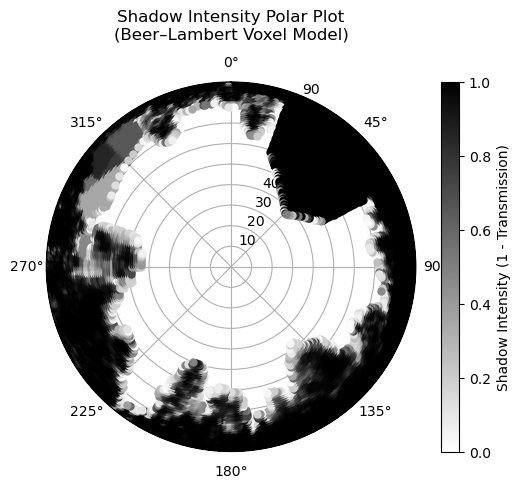

In [ ]:
altitude_range = np.arange(0, 90, 1)
azimuth_range = np.arange(0, 360, 1)

plot_shadow_polar(shadow_matrix_df.values, altitude_range, azimuth_range)

In [114]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shadow_polar_refined(matrix_df):
    """
    Refined polar plot for shadow attenuation matrix.
    Uses pcolormesh for a continuous hemispherical representation.
    """
    # 1. Extract and clean degree values from the DataFrame headers
    # Assumes headers are 'Altitude_X' and 'Azimuth_Y'
    altitudes = np.array([int(i.split('_')[1]) for i in matrix_df.index])
    azimuths = np.array([int(c.split('_')[1]) for c in matrix_df.columns])

    # 2. Create a grid for the polar plot
    # Theta (Azimuth) and R (90 - Altitude for zenith-center)
    theta, r = np.meshgrid(np.radians(azimuths), 90 - altitudes)
    
    # fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'}, dpi=100)


    # 3. Use pcolormesh for continuous shading
    # matrix_df values represent (1 - transmittance)
    pc = ax.pcolormesh(theta, r, matrix_df.values, cmap='Greys', shading='auto', vmin=0, vmax=1, edgecolors='face')
    # levels = np.linspace(0, 1, 100)
    # pc = ax.contourf(theta, r, matrix_df.values, levels=levels, cmap='Greys', extend='both')

    # 4. Standardize for Hemispherical Photography (DHP) style
    ax.set_theta_zero_location('N') # North at the top
    ax.set_theta_direction(-1)      # Clockwise rotation
    ax.set_ylim(0, 90)              # Center is Zenith (0), outer ring is Horizon (90)
    
    # Labeling for academic clarity

    # Position y-labels at 0 degrees (North/Up)
    ax.set_rlabel_position(0) 
    
    # Set y-ticks at 10-degree intervals
    tick_positions = np.arange(10, 90, 10)
    tick_labels = [f'{90 - p}°' for p in tick_positions] # Results in 80, 70, ..., 10

    ax.set_yticks(tick_positions)
    ax.set_yticklabels(tick_labels, fontsize=9, color='black')

    ax.grid(True, linestyle='--', alpha=0.5)

    # ax.set_yticklabels(['80°', '60°', '40°', '20°', '0°']) # Elevation labels
    ax.set_title('Shadow Matrix Polar Plot\n(Voxel-Based API Model)\n', 
                 va='bottom', fontsize=12)

    # 5. Add professional colorbar
    cbar = fig.colorbar(pc, ax=ax, pad=0.1, shrink=0.6, aspect=20)
    cbar.set_label('Shadow Intensity (1 - Transmittance)', rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.show()

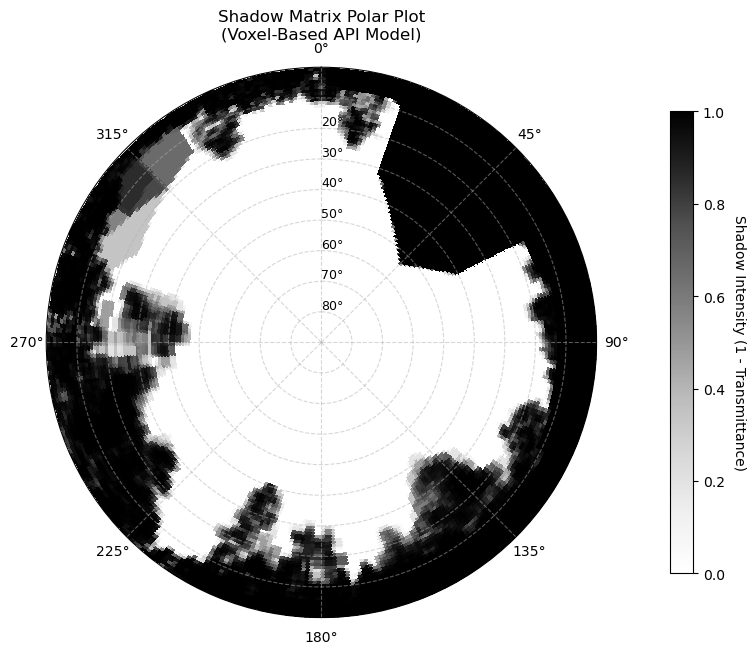

In [115]:
plot_shadow_polar_refined(shadow_matrix_df)

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shadow_polar_final(matrix_df):
    """
    Final academic-grade polar plot for shadow attenuation.
    Coordinates: Zenith at center (90), Horizon at edge (0).
    """
    # 1. Parse degrees from headers
    altitudes = np.array([int(i.split('_')[1]) for i in matrix_df.index])
    azimuths = np.array([int(c.split('_')[1]) for c in matrix_df.columns])

    # 2. Setup the coordinate grid
    # Theta (Azimuth) and R (Altitude)
    theta, r = np.meshgrid(np.radians(azimuths), altitudes)
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

    # 3. Create smooth filled contours
    # Levels=100 ensures a continuous 'turbid medium' look
    levels = np.linspace(0, 1, 100)
    pc = ax.contourf(theta, r, matrix_df.values, levels=levels, cmap='Greys', extend='both')

    # 4. Standardize for Boreal Hemispherical Analysis
    ax.set_theta_zero_location('N') # North at top
    ax.set_theta_direction(-1)      # Clockwise
    ax.set_ylim(0, 90)              # Elevation 0 (horizon) to 90 (zenith)
    
    # Align labels to the North (0°) axis
    ax.set_rlabel_position(0) 
    ax.set_rticks(np.arange(10, 100, 10))
    ax.set_yticklabels([f'{i}°' for i in np.arange(10, 100, 10)], 
                       fontsize=9, color='blue', alpha=0.7, fontweight='bold')

    ax.set_title('Hemispherical Shadow Attenuation Matrix\nPaasisalo, Kuopio | Voxel API Model (β=2.63)\n', 
                 va='bottom', fontsize=12, fontweight='bold')

    # 5. Add a compact, professional colorbar
    cbar = fig.colorbar(pc, ax=ax, pad=0.1, shrink=0.4, aspect=25)
    cbar.set_label('Shadow Intensity (1 - Transmittance)', fontsize=10)
    cbar.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
    
    plt.tight_layout()
    plt.show()

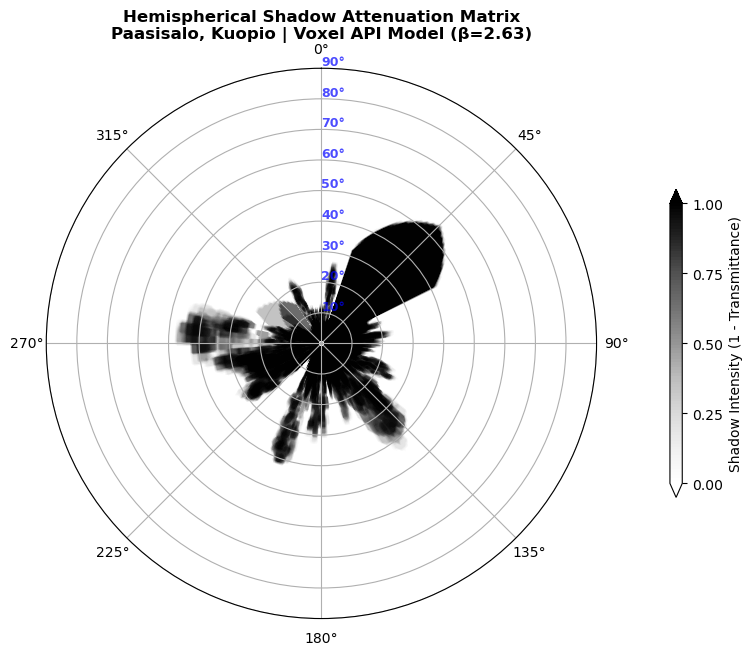

In [66]:
plot_shadow_polar_final(shadow_matrix_df)

In [1]:
import fmi_pv_forecaster as pvfc
# from fmi_pv_forecaster import PVForecaster

pvfc.set_angles(12, 170)
pvfc.set_location(62.979849,27.648656)
pvfc.set_nominal_power_kw(3.96)

pvfc.print_info()

data = pvfc.get_default_fmi_forecast()

print("Forecast:")
print(data)

System location(WGS84): 62.979849, 27.648656
Panel angles: 12, 170
System power: 3.96
Timezone: UTC
Extended output: False
Other Parameters:
  Panel Elevation: 7
  Air Temprtature: 20
  Wind Speed: 2
  Albedo: 0.25
  Timestep: 60
  Time offset: 30
Forecast:
                        T  wind  module_temp       output
Time                                                     
2026-02-13 09:30:00 -18.9  0.64   -18.900000     0.000000
2026-02-13 10:30:00 -18.0  0.43    -9.235920  1282.807255
2026-02-13 11:30:00 -17.3  0.36    -9.348506  1149.711526
2026-02-13 12:30:00 -17.0  0.36   -11.109404   831.711522
2026-02-13 13:30:00 -17.6  0.65   -14.795944   364.543580
...                   ...   ...          ...          ...
2026-02-16 00:30:00   NaN   NaN          NaN     0.000000
2026-02-16 01:30:00   NaN   NaN          NaN     0.000000
2026-02-16 02:30:00   NaN   NaN          NaN     0.000000
2026-02-16 03:30:00   NaN   NaN          NaN     0.000000
2026-02-16 04:30:00   NaN   NaN          NaN  

In [116]:
from collections import Counter
from datetime import datetime

def get_top_days(file_path, top_n=20):
    """
    Counts lines per day and returns the top N busiest days.
    """
    counts = Counter()
    
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # The date is the first 10 characters: "YYYY MM DD"
                day = line[:10].strip()
                if day:
                    counts[day] += 1
        
        # Get the top N results
        most_common = counts.most_common(top_n)
        
        return most_common

    except FileNotFoundError:
        return "File not found. Please check the path."

In [117]:
results = get_top_days('data/Clear_sky_minutes_kuopio_RH16.txt')
for day, count in results:
    print(f"{day}: {count} lines")

2021 07 03: 914 lines
2021 07 04: 872 lines
2021 06 09: 821 lines
2021 06 11: 801 lines
2021 05 13: 796 lines
2021 06 10: 796 lines
2021 05 12: 791 lines
2021 06 04: 781 lines
2021 07 14: 759 lines
2021 07 26: 747 lines
2021 05 30: 722 lines
2021 06 29: 722 lines
2021 07 16: 720 lines
2021 06 02: 719 lines
2021 04 19: 716 lines
2021 04 17: 710 lines
2021 04 16: 692 lines
2021 07 02: 664 lines
2021 06 06: 658 lines
2021 07 27: 657 lines


In [132]:
import collections
import pandas as pd
import numpy as np

def find_clear_days(file_path, print_results=True):
    # 1. Efficiently count lines per day
    counts = collections.Counter()
    
    with open(file_path, 'r') as f:
        for line in f:
            # Slicing "YYYY MM DD" from the start of the line
            day = line[:10].strip()
            if day:
                counts[day] += 1

    # 2. Convert to DataFrame for statistical analysis
    df = pd.DataFrame(list(counts.items()), columns=['Date', 'LineCount'])
    
    # 3. Calculate IQR (Interquartile Range)
    Q1 = df['LineCount'].quantile(0.25)
    Q3 = df['LineCount'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the "High Outlier" threshold
    # 1.5 is standard; use 3.0 for "Extreme" outliers
    upper_bound = Q3 + 0.8 * IQR
    
    # 4. Filter for statistically significant days
    significant_days = df[df['LineCount'] > upper_bound].copy()
    
    # Sort by count to get the most significant first
    significant_days = significant_days.sort_values(by='LineCount', ascending=False)
    
    # 5. Output Results
    if print_results:
        print(f"Total days analyzed: {len(df)}")
        print(f"Statistical Upper Bound: {upper_bound:.2f} lines/day")
        print(f"Number of statistically significant days: {len(significant_days)}")
        print("-" * 30)
        print("Top Statistically Significant Days:")
        print(significant_days.head(20).to_string(index=False))

    return significant_days

# Usage
# analyze_file('data/Clear_sky_minutes_kuopio_RH16.txt')

In [133]:
find_clear_days('data/Clear_sky_minutes_kuopio_RH16.txt')

Total days analyzed: 132
Statistical Upper Bound: 649.50 lines/day
Number of statistically significant days: 20
------------------------------
Top Statistically Significant Days:
      Date  LineCount
2021 07 03        914
2021 07 04        872
2021 06 09        821
2021 06 11        801
2021 06 10        796
2021 05 13        796
2021 05 12        791
2021 06 04        781
2021 07 14        759
2021 07 26        747
2021 05 30        722
2021 06 29        722
2021 07 16        720
2021 06 02        719
2021 04 19        716
2021 04 17        710
2021 04 16        692
2021 07 02        664
2021 06 06        658
2021 07 27        657


Date  LineCount
72  2021 07 03        914
73  2021 07 04        872
50  2021 06 09        821
52  2021 06 11        801
51  2021 06 10        796
30  2021 05 13        796
29  2021 05 12        791
45  2021 06 04        781
83  2021 07 14        759
94  2021 07 26        747
40  2021 05 30        722
69  2021 06 29        722
85  2021 07 16        720
43  2021 06 02        719
12  2021 04 19        716
10  2021 04 17        710
9   2021 04 16        692
71  2021 07 02        664
47  2021 06 06        658
95  2021 07 27        657

datetime.date(2021, 7, 3)

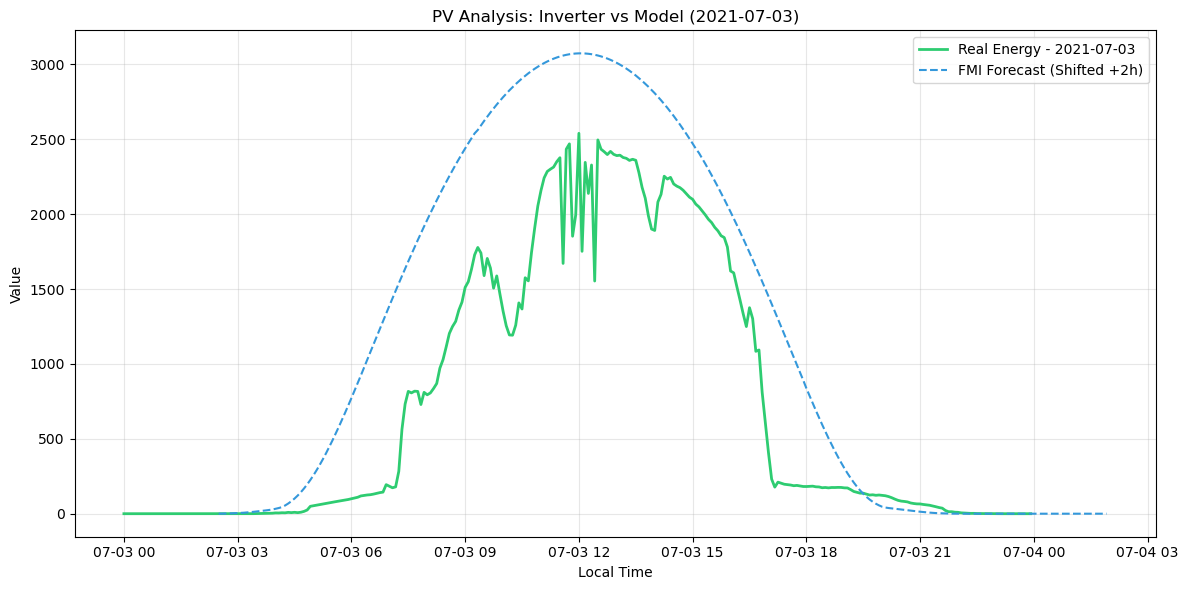

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import fmi_pv_forecaster as pvfc
from datetime import timedelta
from datetime import datetime

# 1. Load and Clean Excel Data
file_path = 'data/pvdata/pv_21.xlsx'  # Replace with your filename
df = pd.read_excel(file_path, usecols=[0, 2], skiprows=[0, 1], header=None)
df.columns = ['Timestamp', 'Energy_Wh']
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)

# Apply your specific transformation
df['Power_Transformed'] = df['Energy_Wh'] * 12

# 2. Identify a "Significant" Day to Plot
# We'll pick the day with the highest total production
# daily_sum = df.groupby(df['Timestamp'].dt.date)['Energy_Wh'].sum()
# best_day = daily_sum.idxmax()
# day_data = df[df['Timestamp'].dt.date == best_day].copy()

best_day = find_clear_days('data/Clear_sky_minutes_kuopio_RH16.txt', print_results=False).iloc[0]['Date']
best_day = datetime.strptime(best_day, '%Y %m %d').date()
day_data = df[df['Timestamp'].dt.date == best_day].copy()
display(best_day)

# 3. Setup and Fetch Forecast
# Parameters based on your Symo 8.2 inverter and PhD research context
pvfc.set_angles(12, 170)
pvfc.set_location(62.979849,27.648656)
pvfc.set_nominal_power_kw(3.96)

# Get clearsky estimate for the specific day (5-min resolution)
start_dt = pd.Timestamp(best_day)
end_dt = start_dt + timedelta(hours=23, minutes=55)
forecast = pvfc.get_clearsky_estimate_for_interval(start_dt, end_dt, 5)

# 4. Apply Time Shift (+2 Hours)
# We shift the index of the forecast 2 hours forward
forecast.index = forecast.index + timedelta(hours=2)

# 5. Plotting
plt.figure(figsize=(12, 6))

# Plot Inverter Data (Transformed)
plt.plot(day_data['Timestamp'], day_data['Power_Transformed'], 
         label=f'Real Energy - {best_day}', color='#2ecc71', lw=2)

# Plot Forecast (Shifted)
plt.plot(forecast.index, forecast['output'], 
         label='FMI Forecast (Shifted +2h)', color='#3498db', linestyle='--')

plt.title(f"PV Analysis: Inverter vs Model ({best_day})")
plt.xlabel("Local Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

In [135]:
file_path = 'data/pvdata/pv_21.xlsx'  # Replace with your filename
df = pd.read_excel(file_path, usecols=[0, 2], skiprows=[0, 1], header=None)
df.columns = ['Timestamp', 'Energy_Wh']
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)

# Apply your specific transformation
df['Power_Transformed'] = df['Energy_Wh'] / 12

# 2. Identify a "Significant" Day to Plot
# We'll pick the day with the highest total production
# daily_sum = df.groupby(df['Timestamp'].dt.date)['Energy_Wh'].sum()
# best_day = daily_sum.idxmax()
# day_data = df[df['Timestamp'].dt.date == best_day].copy()

best_day = find_clear_days('data/Clear_sky_minutes_kuopio_RH16.txt', print_results=False).iloc[0]['Date']
day_data = df[df['Timestamp'].dt.date == best_day].copy()
display(best_day)

'2021 07 03'

In [137]:
datetime.strptime(best_day, '%Y %m %d').date()

datetime.date(2021, 7, 3)